In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [6]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [8]:
tips = tips.drop_duplicates()

In [9]:
tips.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [10]:
tips.shape

(243, 7)

<AxesSubplot:xlabel='total_bill'>

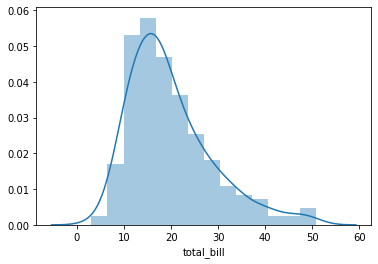

In [11]:
sns.distplot(tips.total_bill)

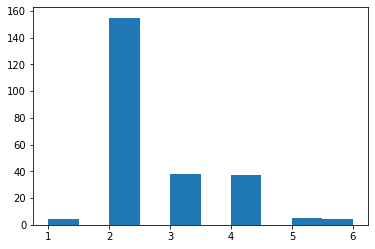

In [12]:
plt.hist(tips['size'])
plt.show()

In [13]:
tips.sex.value_counts()

Male      157
Female     86
Name: sex, dtype: int64

In [14]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    61
Fri     19
Name: day, dtype: int64

In [15]:
tips.time.value_counts()

Dinner    176
Lunch      67
Name: time, dtype: int64

In [16]:
tips.smoker.value_counts()

No     151
Yes     92
Name: smoker, dtype: int64

In [17]:
df_dummies = pd.get_dummies(tips[['sex','day','time','smoker']], drop_first = True)
df_dummies

,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
0,1,0,0,1,1,1
1,0,0,0,1,1,1
2,0,0,0,1,1,1
3,0,0,0,1,1,1
4,1,0,0,1,1,1
...,...,...,...,...,...,...
239,0,0,1,0,1,1
240,1,0,1,0,1,0
241,0,0,1,0,1,0
242,0,0,1,0,1,1


In [18]:
tips = pd.concat([tips, df_dummies], axis = 1)

In [19]:
tips

,total_bill,tip,sex,smoker,day,time,size,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0,1,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,0,1,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,0,1,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,0,1,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,0,1,0,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,1,0,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,0,1,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,0,1,0,1,1


In [20]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'sex_Female', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner',
       'smoker_No'],
      dtype='object')

In [21]:
tips.drop(columns = ['sex', 'time','smoker', 'day'], inplace = True)

In [22]:
tips

,total_bill,tip,size,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
0,16.99,1.01,2,1,0,0,1,1,1
1,10.34,1.66,3,0,0,0,1,1,1
2,21.01,3.50,3,0,0,0,1,1,1
3,23.68,3.31,2,0,0,0,1,1,1
4,24.59,3.61,4,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,0,1,0,1,1
240,27.18,2.00,2,1,0,1,0,1,0
241,22.67,2.00,2,0,0,1,0,1,0
242,17.82,1.75,2,0,0,1,0,1,1


In [23]:
## lets create a target variable
tips['low_tip_target'] = tips.tip/tips.total_bill < 0.15

In [24]:
tips.head()

,total_bill,tip,size,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No,low_tip_target
0,16.99,1.01,2,1,0,0,1,1,1,True
1,10.34,1.66,3,0,0,0,1,1,1,False
2,21.01,3.50,3,0,0,0,1,1,1,False
3,23.68,3.31,2,0,0,0,1,1,1,True
4,24.59,3.61,4,1,0,0,1,1,1,True


In [25]:
tips.drop(columns = ['tip'], inplace = True)

In [26]:
tips.head()

,total_bill,size,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No,low_tip_target
0,16.99,2,1,0,0,1,1,1,True
1,10.34,3,0,0,0,1,1,1,False
2,21.01,3,0,0,0,1,1,1,False
3,23.68,2,0,0,0,1,1,1,True
4,24.59,4,1,0,0,1,1,1,True


In [27]:
train_validate, test = train_test_split(tips, test_size = 0.2, random_state = 123, stratify = tips.low_tip_target)

In [28]:
train, validate = train_test_split(train_validate, test_size = 0.2, random_state = 123, stratify = train_validate.low_tip_target)

In [29]:
train.shape, test.shape, validate.shape

((155, 9), (49, 9), (39, 9))

#### Set baseline

In [30]:
train.low_tip_target.value_counts(normalize = True)

## this basically is the accuracy of our baseline model. Based on this, if we were to predict for ever observation, 
## the person is not a low tipper, we will be right 55 % of the time. So, prediciting someone is not a low tipper 
## is our positive

False    0.554839
True     0.445161
Name: low_tip_target, dtype: float64

## Model 1
### Models vary in the following:
- different hyperparameters(changing value for different arguments)
- different features
- different algorithms(logit, decision tree, etc)

In [31]:
logit = LogisticRegression()


In [32]:
x_train = train.drop(columns = ['low_tip_target'])
y_train = train.low_tip_target

x_validate = validate.drop(columns = ['low_tip_target'])
y_validate = validate.low_tip_target

x_test = test.drop(columns = ['low_tip_target'])
y_test = test.low_tip_target


In [33]:
logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
logit.coef_

array([[ 0.10305551, -0.12814202, -0.27741224, -0.12830468,  0.109808  ,
        -0.40600293, -0.25507484,  0.09393403]])

In [35]:
logit.intercept_

array([-1.62742397])

In [36]:
# Predicting value on x_train
y_pred = logit.predict(x_train)
y_pred_proba= logit.predict_proba(x_train)

In [37]:
y_pred

array([False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True,  True, False,  True, False, False,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,

In [38]:
logit.score(x_train, y_train)

0.6903225806451613

In [39]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.68      0.83      0.75        86
        True       0.71      0.52      0.60        69

    accuracy                           0.69       155
   macro avg       0.69      0.67      0.67       155
weighted avg       0.69      0.69      0.68       155



### Model 2

In [40]:
logit2 = LogisticRegression(C = 100)

In [41]:
logit2.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = logit2.predict(x_train)
y_pred_proba= logit2.predict_proba(x_train)

In [43]:
logit2.score(x_train, y_train)

0.6903225806451613

In [44]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.68      0.83      0.75        86
        True       0.71      0.52      0.60        69

    accuracy                           0.69       155
   macro avg       0.69      0.67      0.67       155
weighted avg       0.69      0.69      0.68       155



### Lets evaluate our model 1 and 2 with validate sample

In [45]:
y_pred = logit.predict(x_validate)
y_pred2 = logit2.predict(x_validate)

In [46]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

       False       0.62      0.73      0.67        22
        True       0.54      0.41      0.47        17

    accuracy                           0.59        39
   macro avg       0.58      0.57      0.57        39
weighted avg       0.58      0.59      0.58        39



In [47]:
print(classification_report(y_validate, y_pred2))

              precision    recall  f1-score   support

       False       0.62      0.73      0.67        22
        True       0.54      0.41      0.47        17

    accuracy                           0.59        39
   macro avg       0.58      0.57      0.57        39
weighted avg       0.58      0.59      0.58        39

